In [65]:
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pyplot as plt

# Set working directory
os.chdir('/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/iterative_alternative/analyze_mecp2_cpg_enrichment')


# Serial


In [33]:
# Read the input file
df_serial = pd.read_csv('mecp2_cpg_enrichment/mecp2_cpg_enrichment.csv')
print(f"Total regions: {len(df_serial)}")


Total regions: 17017


In [34]:
np.sum(df_serial['significant'])

22

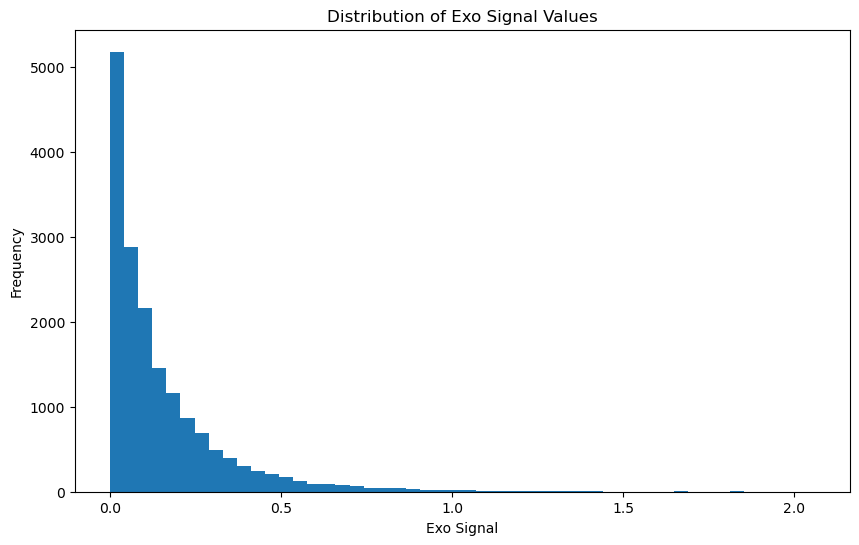

In [35]:
plt.figure(figsize=(10,6))
plt.hist(df_serial['exo_signal'], bins=50)
plt.xlabel('Exo Signal')
plt.ylabel('Frequency')
plt.title('Distribution of Exo Signal Values')
plt.show()

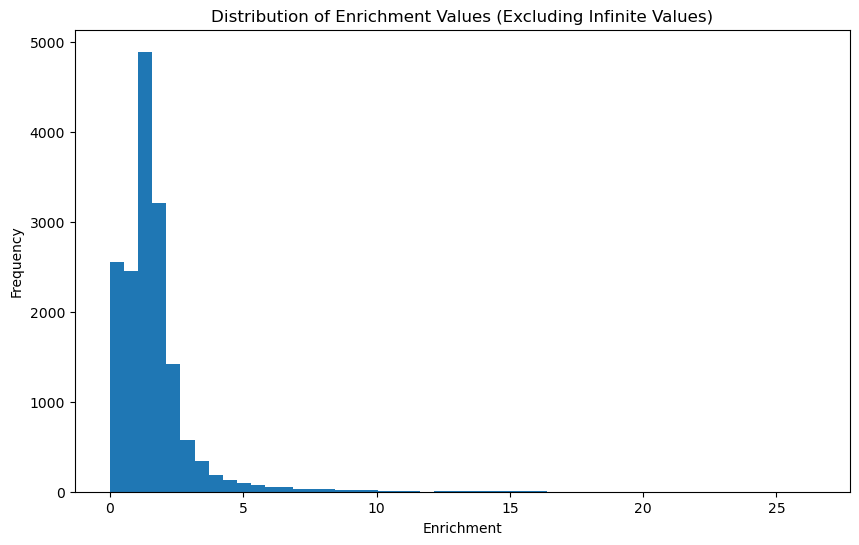

In [36]:
plt.figure(figsize=(10,6))
plt.hist(df_serial[df_serial['enrichment'] != float('inf')]['enrichment'], bins=50)
plt.xlabel('Enrichment')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Values (Excluding Infinite Values)')
plt.show()

In [37]:
df_serial.loc[df_serial['enrichment'] == float('inf'), 'enrichment'] = 10

In [38]:
df_serial = df_serial[df_serial['exo_signal'] > 0.1]

In [39]:
df_serial.head()

,chr,start,end,exo_signal,endo_signal,enrichment,significant
2,chr1,3671654,3672156,0.218376,0.179650,1.215567,False
7,chr1,4785376,4785814,0.354838,0.278872,1.272405,False
9,chr1,4857465,4858372,0.639017,0.300304,2.127902,False
10,chr1,5018557,5019711,0.158385,0.067396,2.350067,False
11,chr1,5083039,5083536,0.164911,0.156959,1.050664,False


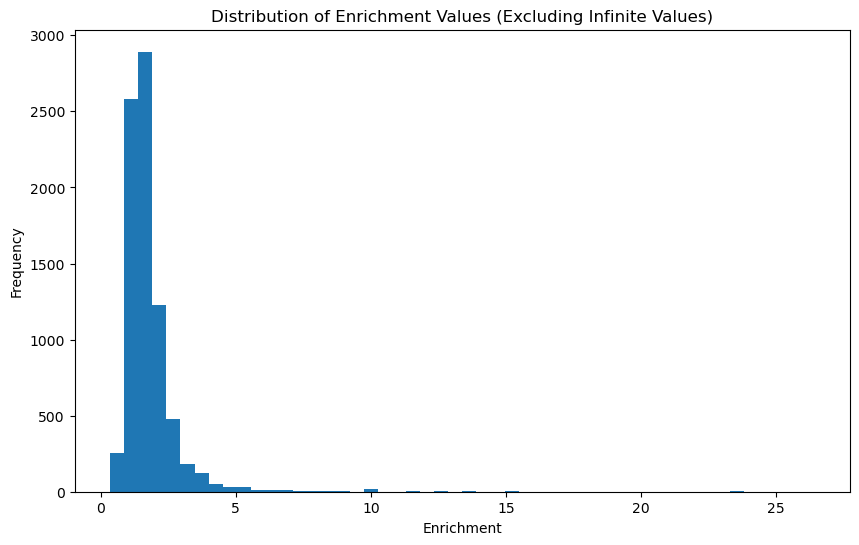

In [40]:
plt.figure(figsize=(10,6))
plt.hist(df_serial[df_serial['enrichment'] != float('inf')]['enrichment'], bins=50)
plt.xlabel('Enrichment')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Values (Excluding Infinite Values)')
plt.show()

In [41]:
df_serial = df_serial.sort_values('enrichment', ascending=False)

In [42]:
df_serial.head()

,chr,start,end,exo_signal,endo_signal,enrichment,significant
11012,chr5,35525417,35525676,0.104553,0.003956,26.427297,False
9691,chr3,158561302,158562304,0.121210,0.004870,24.891312,False
12299,chr6,91212723,91212972,0.105519,0.004268,24.723086,False
13530,chr7,121734241,121735053,0.158421,0.006519,24.302147,False
268,chr1,72824693,72824937,0.186296,0.007881,23.639277,False


# Parallel


In [66]:
# Get list of all chunk files
chunk_files = glob.glob('mecp2_cpg_enrichment_parallel/chunk_*.csv')
chunk_files

['mecp2_cpg_enrichment_parallel/chunk_1.csv',
 'mecp2_cpg_enrichment_parallel/chunk_7.csv',
 'mecp2_cpg_enrichment_parallel/chunk_6.csv',
 'mecp2_cpg_enrichment_parallel/chunk_4.csv',
 'mecp2_cpg_enrichment_parallel/chunk_8.csv',
 'mecp2_cpg_enrichment_parallel/chunk_2.csv',
 'mecp2_cpg_enrichment_parallel/chunk_5.csv',
 'mecp2_cpg_enrichment_parallel/chunk_0.csv',
 'mecp2_cpg_enrichment_parallel/chunk_3.csv',
 'mecp2_cpg_enrichment_parallel/chunk_9.csv']

In [67]:
# Read and concatenate all chunks
df_parallel = pd.concat([pd.read_csv(f) for f in chunk_files], ignore_index=True)

# Sort by chromosome and start position
df_parallel = df_parallel.sort_values(['chr', 'start'])

print(f"Total regions analyzed: {len(df_parallel)}")

Total regions analyzed: 15488


In [68]:
df_parallel.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,peak_width_exo,peak_width_endo,significant
11509,chr1,3531624,3531843,0.000000,9.106789,0.000000,1.000000,endo_only,0.000000,416.000000,False
11510,chr1,3670619,3671074,18.491892,220.268700,0.083952,0.034350,both,331.900000,1844.000000,False
11511,chr1,3671654,3672156,155.805891,242.090101,0.643586,0.869996,both,599.000000,849.666667,False
11512,chr1,4491701,4493673,10.535172,4.862904,2.166436,0.608408,both,218.333333,297.000000,False
11513,chr1,4496947,4497608,4.101856,8.770943,0.467664,1.000000,both,706.000000,523.000000,False


In [69]:
df_parallel['significant'] = True

In [70]:
df_parallel.to_csv('mecp2_cpg_enrichment_parallel/mecp2_cpg_enrichment_parallel.csv', index=False)

In [71]:
# df_parallel = df_parallel[(df_parallel['exo_signal'] > 4.0) | (df_parallel['endo_signal'] > 4.0)]

In [72]:
df_both = df_parallel[df_parallel['binding_type'] == "both"]
df_both.shape

(14573, 11)

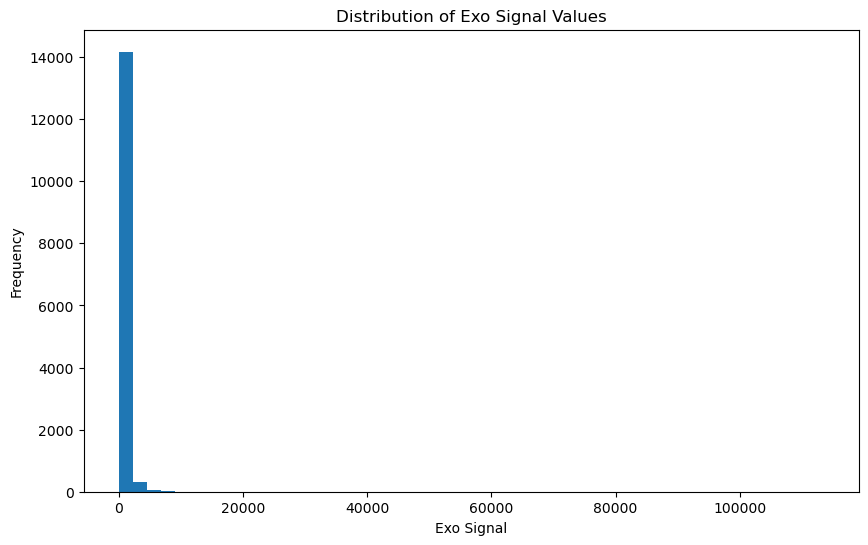

In [73]:
plt.figure(figsize=(10,6))
plt.hist(df_both['exo_signal'], bins=50)
plt.xlabel('Exo Signal')
plt.ylabel('Frequency')
plt.title('Distribution of Exo Signal Values')
plt.show()

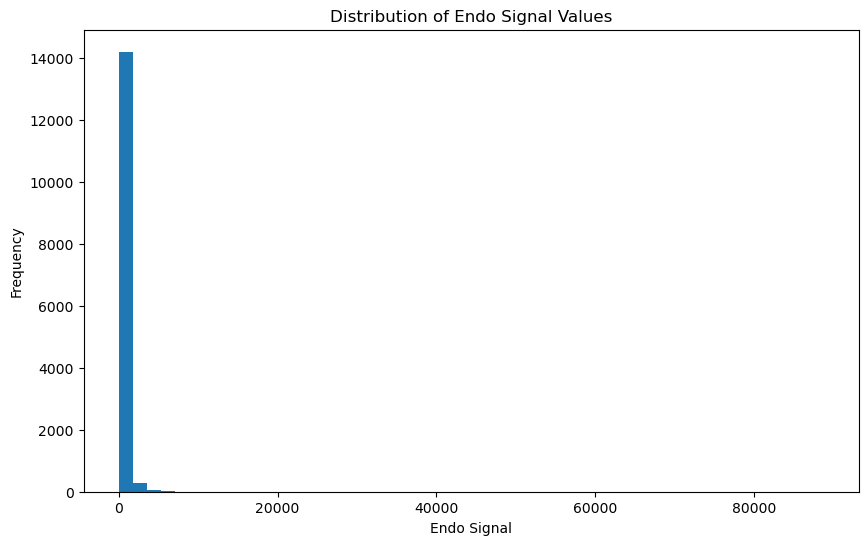

In [74]:
plt.figure(figsize=(10,6))
plt.hist(df_both['endo_signal'], bins=50)
plt.xlabel('Endo Signal')
plt.ylabel('Frequency')
plt.title('Distribution of Endo Signal Values')
plt.show()

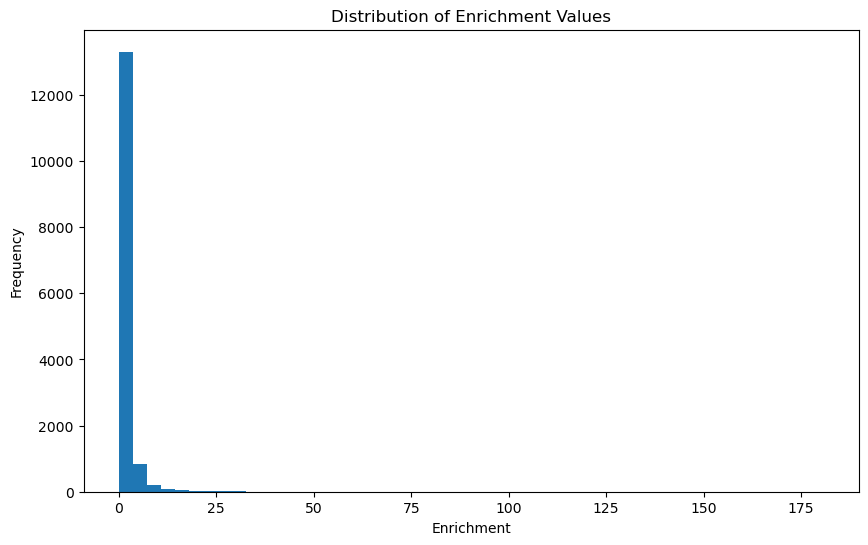

In [75]:
plt.figure(figsize=(10,6))
plt.hist(df_both['enrichment'], bins=50)
plt.xlabel('Enrichment')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Values')
plt.show()

In [76]:
df_both = df_both.sort_values('enrichment', ascending=False)
df_both.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,peak_width_exo,peak_width_endo,significant
11771,chr1,72824693,72824937,223.579760,1.237285,180.701942,0.039143,both,1074.200000,157.0,True
8728,chr13,53111251,53111503,206.733866,1.753152,117.921217,0.046730,both,958.250000,289.0,True
9769,chr15,76176731,76177408,100.841467,0.880443,114.534954,0.060298,both,1773.666667,169.0,True
13063,chr10,127195381,127195717,167.855195,1.592687,105.391196,0.060298,both,1199.666667,214.0,True
4913,chr6,18030271,18030637,116.730941,1.163254,100.348620,0.039143,both,673.625000,237.0,True


In [77]:
df_both['significant'] = True

In [78]:
df_both.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,peak_width_exo,peak_width_endo,significant
11771,chr1,72824693,72824937,223.579760,1.237285,180.701942,0.039143,both,1074.200000,157.0,True
8728,chr13,53111251,53111503,206.733866,1.753152,117.921217,0.046730,both,958.250000,289.0,True
9769,chr15,76176731,76177408,100.841467,0.880443,114.534954,0.060298,both,1773.666667,169.0,True
13063,chr10,127195381,127195717,167.855195,1.592687,105.391196,0.060298,both,1199.666667,214.0,True
4913,chr6,18030271,18030637,116.730941,1.163254,100.348620,0.039143,both,673.625000,237.0,True


In [79]:
df_both.to_csv('mecp2_cpg_enrichment_parallel/mecp2_cpg_enrichment_both.csv', index=False)

# Integrate

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Load the integrated results
results_dir = "integrated/"
df = pd.read_csv(f"{results_dir}/mecp2_enriched_genes.csv")

In [57]:
df.head()

,gene,chr,cpg_start,cpg_end,mecp2_enrichment,exo_signal,endo_signal,distance_to_gene,baseMean,log2FoldChange,padj
0,Cpz,chr5,35525417,35525676,26.427297,0.104553,0.003956,22,NaN,NaN,NaN
1,Mtfmt,chr9,65435695,65436093,26.274294,0.185030,0.007042,87,176.482987,-0.140470,6.376596e-01
2,Hexim1,chr11,103117220,103117987,25.393523,0.466094,0.018355,989,2168.242965,0.184413,5.216627e-02
3,Fbln2,chr6,91212723,91212972,25.081176,0.107047,0.004268,268,12609.885110,0.649190,7.391040e-16
4,Kcnh4,chr11,100759516,100760117,25.000000,0.121427,0.000000,175,NaN,NaN,NaN


In [58]:
# Define gene categories based on RNA-seq data
def categorize_gene(row, fc_threshold=0.5, padj_threshold=0.05):
    if pd.isna(row['log2FoldChange']) or pd.isna(row['padj']):
        return 'non-deregulated'
    elif row['padj'] > padj_threshold:
        return 'non-deregulated'
    elif row['log2FoldChange'] >= fc_threshold:
        return 'up-regulated'
    elif row['log2FoldChange'] <= -fc_threshold:
        return 'down-regulated'
    else:
        return 'non-deregulated'

In [59]:
# Add category column
df['category'] = df.apply(categorize_gene, axis=1)


In [60]:
df['category'].value_counts()

category
non-deregulated    11401
up-regulated        2157
down-regulated      2080
Name: count, dtype: int64

In [61]:
# Create the density plot
plt.figure(figsize=(12, 8))

# Plot density for each category
for category, color in zip(['non-deregulated', 'up-regulated', 'down-regulated'], 
                         ['blue', 'orange', 'green']):
    subset = df[df['category'] == category]
    if len(subset) > 0:
        sns.kdeplot(data=subset['mecp2_enrichment'], 
                   label=category,
                   color=color)

plt.title('Mecp2 Enrichment Distribution by Gene Category')
plt.xlabel('Enrichment (Exo/Endo)')
plt.ylabel('Density')
plt.xlim(0, 8)  
plt.ylim(0, 1.2)
plt.legend()

# Add some statistics
for category in ['non-deregulated', 'up-regulated', 'down-regulated']:
    subset = df[df['category'] == category]
    print(f"\n{category}:")
    print(f"Number of genes: {len(subset)}")
    print(f"Mean enrichment: {subset['mecp2_enrichment'].mean():.2f}")
    print(f"Median enrichment: {subset['mecp2_enrichment'].median():.2f}")

# Save the plot
plt.savefig(f"{results_dir}/mecp2_enrichment_by_expression.pdf", 
            bbox_inches='tight', dpi=300)
plt.close()


non-deregulated:
Number of genes: 11401
Mean enrichment: 1.66
Median enrichment: 1.45

up-regulated:
Number of genes: 2157
Mean enrichment: 1.70
Median enrichment: 1.48

down-regulated:
Number of genes: 2080
Mean enrichment: 1.54
Median enrichment: 1.47


In [62]:
from scipy import stats

# Perform Kruskal-Wallis H-test
categories = ['non-deregulated', 'up-regulated', 'down-regulated']
samples = [df[df['category'] == cat]['mecp2_enrichment'] for cat in categories]
h_stat, p_value = stats.kruskal(*samples)

print("\nStatistical Test:")
print(f"Kruskal-Wallis H-statistic: {h_stat:.2f}")
print(f"p-value: {p_value:.2e}")

# Optional: Create a boxplot for another visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='mecp2_enrichment')
plt.title('Mecp2 Enrichment by Gene Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{results_dir}/mecp2_enrichment_boxplot.pdf")
plt.close()


Statistical Test:
Kruskal-Wallis H-statistic: 9.88
p-value: 7.17e-03
